In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import confusion_matrix

from sklearn import datasets

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

%matplotlib inline
pd.set_option("display.max_columns", None)

In [2]:
cars = pd.read_csv("e_9-5-2019-no-sales-_9_4_2019public.csv")
c = ['Division', '# Cyl', \
     'City FE (Guide) - Conventional Fuel',\
     'Hwy FE (Guide) - Conventional Fuel', 'Comb FE (Guide) - Conventional Fuel',\
      'City CO2 Rounded Adjusted', 'FE Rating (1-10 rating on Label)',\
    'Annual Fuel1 Cost - Conventional Fuel'
    ]
cars = pd.read_csv("e_9-5-2019-no-sales-_9_4_2019public.csv", usecols = c, index_col = "Division")

cars.head(5)

,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Annual Fuel1 Cost - Conventional Fuel,FE Rating (1-10 rating on Label),City CO2 Rounded Adjusted
Division,,,,,,,
Acura,6,21,22,21,2150,4,419
ALFA ROMEO,4,24,34,28,1600,6,365
Aston Martin Lagonda Ltd,8,18,25,21,2150,4,494
Audi,4,23,31,26,1450,5,384
BMW,4,25,32,28,1600,6,355


In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))
cars_scaled = scaler.fit_transform(cars)

In [4]:
kmeans = KMeans(n_clusters=4)

kmeans_clusters = kmeans.fit_predict(cars_scaled)
kmeans_clusters

array([0, 2, 0, ..., 0, 0, 2])

In [5]:
cars['kmeans_clusters'] = kmeans_clusters

Text(0.5, 1, 'Kmeans Clustering, #clusters = 4')

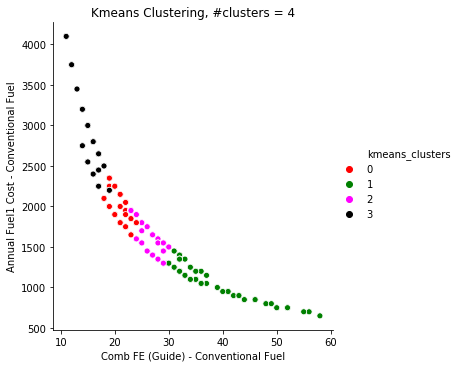

In [14]:
sns.relplot(x = "Comb FE (Guide) - Conventional Fuel", y = "Annual Fuel1 Cost - Conventional Fuel", hue = "kmeans_clusters", \
            palette = ["r", "g", "magenta","black"], data = cars)
plt.title("Kmeans Clustering, #clusters = 4")

In [6]:
tree_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
tree_clusters = tree_cluster.fit_predict(cars_scaled)
tree_clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [7]:
cars['tree_cluster'] = tree_clusters

Text(0.5, 1, 'Tree Clustering, #clusters = 4')

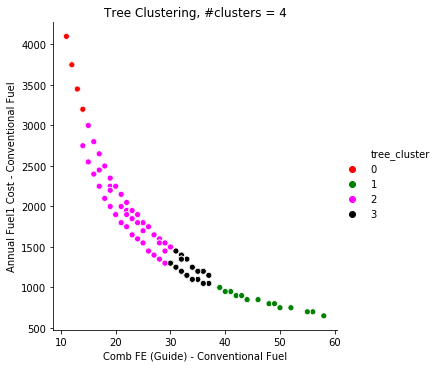

In [15]:
sns.relplot(x = "Comb FE (Guide) - Conventional Fuel", y = "Annual Fuel1 Cost - Conventional Fuel", hue = "tree_cluster", \
            palette = ["r", "g", "magenta","black"], data = cars)
plt.title("Tree Clustering, #clusters = 4")

In [9]:
cars.head(20)

,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Annual Fuel1 Cost - Conventional Fuel,FE Rating (1-10 rating on Label),City CO2 Rounded Adjusted,kmeans_clusters,tree_cluster
Division,,,,,,,,,
Acura,6,21,22,21,2150,4,419,0,2
ALFA ROMEO,4,24,34,28,1600,6,365,2,2
Aston Martin Lagonda Ltd,8,18,25,21,2150,4,494,0,2
Audi,4,23,31,26,1450,5,384,2,2
BMW,4,25,32,28,1600,6,355,2,2
Bugatti,16,9,14,11,4100,1,1010,3,0
Chevrolet,8,12,20,15,3000,2,742,3,2
Chevrolet,8,15,25,18,2500,3,599,3,2
Chevrolet,8,14,23,17,2650,3,654,3,2


In [10]:
cars[cars['kmeans_clusters'] == 0]

,# Cyl,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,Annual Fuel1 Cost - Conventional Fuel,FE Rating (1-10 rating on Label),City CO2 Rounded Adjusted,kmeans_clusters,tree_cluster
Division,,,,,,,,,
Acura,6,21,22,21,2150,4,419,0,2
Aston Martin Lagonda Ltd,8,18,25,21,2150,4,494,0,2
Jaguar,6,20,28,23,1950,5,447,0,2
Jaguar,6,16,24,19,2350,3,562,0,2
Jaguar,6,20,28,23,1950,5,447,0,2
Jaguar,6,16,24,19,2350,3,562,0,2
Jaguar,6,18,26,21,2150,4,490,0,2
Jaguar,6,18,26,21,2150,4,490,0,2
Jaguar,6,19,27,22,2050,4,468,0,2
